In [2]:
import fiona
import numpy as np
import pandas as pd

In [38]:
filename = 'qgis_assets/modulos_automatico_final_new.shp'
shp = fiona.open(filename)

In [39]:
# Plot rectangles with matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Change matplotlib style
plt.style.use('default')

font_mapping = {'family': 'Palatino Linotype', 'weight': 'normal', 'size': 11}
plt.rc('font', **font_mapping)


def plot_panels(shp, color_code, draw_text=False, text=None, draw_legend=True, savefig=None):
    fig, ax = plt.subplots()
    max_x = centroid_table_pd['x'].max() + 2
    min_x = centroid_table_pd['x'].min() - 2
    max_y = centroid_table_pd['y'].max() + 2
    min_y = centroid_table_pd['y'].min() - 2
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    width = 10 * (max_x - min_x) / (max_y - min_y)
    if draw_legend:
        width += 1
    fig.set_size_inches(width, 10)

    # Generate color palette from indices
    palette = np.array(sns.color_palette("hls", len(np.unique(color_code))))

    for (idx, elem) in enumerate(shp):
        x = []
        y = []
        for coord in elem['geometry']['coordinates'][0]:
            x.append(coord[0])
            y.append(coord[1])
        if color_code is None:
            ax.plot(x, y, color='black')
        else:
            ax.plot(x, y, color=palette[color_code[idx]], linewidth=0.5)

    if color_code is not None:
        # Show legend
        for i in range(len(np.unique(color_code))):
            ax.plot([], [], color=palette[i], label=i)
        if draw_legend:
            ax.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    if draw_text:
        for label in np.unique(color_code):
            random_idx = np.random.choice(np.where(color_code == label)[0])
            centroid = centroid_table[random_idx]
            text_label = label if text is None else text[random_idx]
            ax.text(centroid[0], centroid[1], text_label, fontsize=12, color='white', weight='bold', ha='center',
                    va='center', bbox=dict(facecolor='black', edgecolor='none', alpha=0.8))

    plt.tight_layout()
    if savefig is not None:
        plt.savefig(savefig, dpi=500)
    plt.show()


def plot_centroids(centroids, color_code=None, draw_text=False, plot_legend=True, text_size=12, savefig=None):
    fig, ax = plt.subplots()
    max_x = centroids['x'].max() + 2
    min_x = centroids['x'].min() - 2
    max_y = centroids['y'].max() + 2
    min_y = centroids['y'].min() - 2
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    fig.set_size_inches(5 * (max_x - min_x) / (max_y - min_y), 5)

    # Generate color palette from indices
    if plot_legend:
        palette = np.array(sns.color_palette("hls", len(np.unique(color_code))))
    else:
        palette = np.array(sns.color_palette("rocket", len(np.unique(color_code))))
    plt.scatter(centroids['x'], centroids['y'], c=color_code)

    if color_code is not None:
        # Show legend
        for i in range(len(np.unique(color_code))):
            ax.plot([], [], color=palette[i], label=i)
        # Place legend outside of plot
        if plot_legend:
            ax.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    if draw_text:
        for label in np.unique(color_code):
            random_idx = np.random.choice(np.where(color_code == label)[0])
            # From pandas dataframe
            centroid = centroids.iloc[random_idx]
            ax.text(centroid[0], centroid[1], label, fontsize=text_size, color='white', weight='bold', ha='center',
                    va='center', bbox=dict(facecolor='black', edgecolor='none', alpha=0.5))

    plt.tight_layout()
    if savefig is not None:
        plt.savefig(savefig, dpi=500)
    plt.show()

In [ ]:
class Panel:
    def __init__(self):
        self._id_array = None
        self._id_panel = None
        self._geometry = None
        self._centroid = None

    def compute_centroid(self):
        centroid = np.asarray([0, 0], dtype=np.float64)
        for coord in self._geometry['coordinates'][0]:
            centroid[0] += coord[0]
            centroid[1] += coord[1]
        centroid[0] /= len(self._geometry['coordinates'][0])
        centroid[1] /= len(self._geometry['coordinates'][0])
        self._centroid = centroid

In [173]:
centroid_table = []
panels = []
cluster = dict()

for (idx, elem) in enumerate(shp):
    # Calculate centroid
    centroid = np.asarray([0, 0], dtype=np.float64)
    for coord in elem['geometry']['coordinates'][0]:
        centroid[0] += coord[0]
        centroid[1] += coord[1]
    centroid[0] /= len(elem['geometry']['coordinates'][0])
    centroid[1] /= len(elem['geometry']['coordinates'][0])

    centroid_table.append(centroid)
    panels.append(elem)
    if elem['properties']['ID_ARRAY'] not in cluster:
        cluster[elem['properties']['ID_ARRAY']] = []
    cluster[elem['properties']['ID_ARRAY']].append(idx)

0.8743678532297031 1.133451431957703
0.8743678532297031 1.133451431957703
0.924227420500098 1.080113288911882
0.924227420500098 1.080113288911882
0.9195886390815661 1.0434837887081287
0.9195886390815661 1.0434837887081287
0.8751711524050014 1.0106161640445874
0.8731922005964643 1.0094932777860783
0.8713467631043565 1.2148630876968
0.8723967475802535 1.011156763265303
0.8729398226566206 1.010619019331992
0.8746222885123884 1.001241461259705
0.8746222885123884 1.001241461259705
0.8746222885123884 1.001241461259705
0.8690491335550444 1.00921321084931
0.9250901945509716 1.0583188087384656
Number of missing panels: 37


D:\Github\SolarPanelManager\venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Github\SolarPanelManager\venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


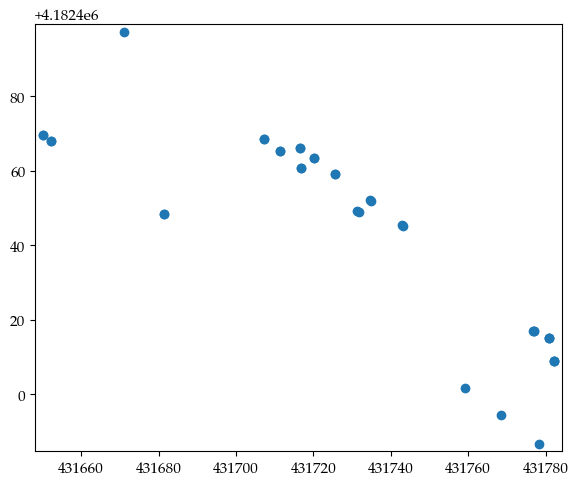

In [177]:
missing_panels = []
threshold_width = 1.1

for key in cluster:
    row_panels = dict()
    row_centroids = dict()

    for idx in cluster[key]:
        if panels[idx]['properties']['ID_ROW'] not in row_panels:
           row_panels[panels[idx]['properties']['ID_ROW']] = []
        row_panels[panels[idx]['properties']['ID_ROW']].append(idx)
        # Sort according to column
        row_panels[panels[idx]['properties']['ID_ROW']].sort(key=lambda x: panels[x]['properties']['ID_COL'])

        if panels[idx]['properties']['ID_ROW'] not in row_centroids:
            row_centroids[panels[idx]['properties']['ID_ROW']] = np.zeros(2)
        row_centroids[panels[idx]['properties']['ID_ROW']] += np.asarray(centroid_table[idx])

    max_cols, max_rows = 0, len(row_panels)
    for row in row_panels:
        row_centroids[row] /= len(row_panels[row])
        if len(row_panels[row]) > max_cols:
            max_cols = len(row_panels[row])

    # Calculate bounding box of array
    min_x = np.min([panels[idx]['geometry']['coordinates'][0][0][0] for idx in cluster[key]])
    max_x = np.max([panels[idx]['geometry']['coordinates'][0][0][0] for idx in cluster[key]])
    min_y = np.min([panels[idx]['geometry']['coordinates'][0][0][1] for idx in cluster[key]])
    max_y = np.max([panels[idx]['geometry']['coordinates'][0][0][1] for idx in cluster[key]])

    # # Calculate inter-distance in y between rows
    # row_distances = []
    # for i in range(len(row_centroids) - 1):
    #     row_distances.append(np.linalg.norm(row_centroids[i + 1] - row_centroids[i]))
    # average_distance_height = np.mean(row_distances)

    for row in row_panels:
        if len(row_panels[row]) < max_cols:
            # Determine spreading direction
            average_direction = np.zeros(2)
            average_width = 0
            average_height = 0
            num_panels = 0

            # # Calculate inter-distance in x between columns
            # col_distances = []
            # for i in range(len(row_panels[row]) - 1):
            #     distance_cols = np.linalg.norm(centroid_table[row_panels[row][i + 1]] - centroid_table[row_panels[row][i]])
            #     if distance_cols > threshold_width:
            #         col_distances.append(distance_cols)
            # average_distance_width = np.mean(col_distances)

            for row in row_panels:
                for idx in row_panels[row]:
                    point0 = np.asarray(panels[idx]['geometry']['coordinates'][0][0])
                    point1 = np.asarray(panels[idx]['geometry']['coordinates'][0][1])
                    point2 = np.asarray(panels[idx]['geometry']['coordinates'][0][2])

                    average_direction = average_direction + np.asarray([point1[0] - point0[0], point1[1] - point0[1]])
                    average_width = average_width + np.linalg.norm(point1 - point0)
                    average_height = average_height + np.linalg.norm(point2 - point1)
                    num_panels += 1
                    # average_direction = average_direction + np.asarray([elem['geometry']['coordinates'][0][3][0] - elem['geometry']['coordinates'][0][0][0],
                    #             elem['geometry']['coordinates'][0][3][1] - elem['geometry']['coordinates'][0][0][1]])

            average_direction = average_direction / num_panels
            average_width = np.abs(average_width / num_panels)
            average_height = np.abs(average_height / num_panels)

            # Normalize both vectors
            module = (average_direction[0] ** 2 + average_direction[1] ** 2) ** 0.5
            norm_x = average_direction / module
            norm_y = np.asarray([-norm_x[1], norm_x[0]])
            print(average_height, average_distance_height)

            # Find missing panels
            current_num_panels = len(row_panels[row])

            for row in row_panels:
                for i in range(len(row_panels[row]) - 1):
                    # Calculate distance between adjacent panels
                    centroid1 = np.asarray(centroid_table[row_panels[row][i]])
                    centroid2 = np.asarray(centroid_table[row_panels[row][i + 1]])
                    distance = np.linalg.norm(centroid1 - centroid2)

                    if distance > average_width * 1.2:
                        # new_centroid = np.divide(np.add(centroid1, centroid2), 2) + norm_x * (distance - average_width * 2) / 2.0 - norm_y * (average_distance_height - average_height) / 2.0
                        new_centroid = centroid1 + norm_x * (average_width + (average_distance_width - average_width * 2)) - norm_y * (average_distance_height - average_height) / 2.0

                        max_x_max_y = new_centroid + norm_x * average_width / 2 + norm_y * average_height / 2
                        min_x_min_y = new_centroid - norm_x * average_width / 2 - norm_y * average_height / 2
                        max_x_min_y = new_centroid + norm_x * average_width / 2 - norm_y * average_height / 2
                        min_x_max_y = new_centroid - norm_x * average_width / 2 + norm_y * average_height / 2
                        missing_panels.append((new_centroid, [max_x_max_y, min_x_max_y, min_x_min_y, max_x_min_y]))

                        current_num_panels += 1

print('Number of missing panels: {}'.format(len(missing_panels)))
missing_panels_centroids = [elem[0] for elem in missing_panels]
missing_panels_centroids_pd = pd.DataFrame(missing_panels_centroids, columns=['x', 'y'])
plot_centroids(missing_panels_centroids_pd, color_code=None, draw_text=False, savefig=None, plot_legend=False, text_size=10)

In [178]:
def polygon_area(geometry_np_array):
    # Calculate area of polygon
    area = 0
    for i in range(len(geometry_np_array) - 1):
        area += geometry_np_array[i][0] * geometry_np_array[i + 1][1] - geometry_np_array[i + 1][0] * geometry_np_array[i][1]
    area += geometry_np_array[-1][0] * geometry_np_array[0][1] - geometry_np_array[0][0] * geometry_np_array[-1][1]
    area = np.abs(area) / 2
    return area

def polygon_perimeter(geometry_np_array):
    # Calculate perimeter of polygon
    perimeter = 0
    for i in range(len(geometry_np_array) - 1):
        perimeter += ((geometry_np_array[i][0] - geometry_np_array[i + 1][0]) ** 2 + (geometry_np_array[i][1] - geometry_np_array[i + 1][1]) ** 2) ** 0.5
    perimeter += ((geometry_np_array[-1][0] - geometry_np_array[0][0]) ** 2 + (geometry_np_array[-1][1] - geometry_np_array[0][1]) ** 2) ** 0.5
    return perimeter

In [179]:
# Write back
schema = shp.schema.copy()
input_crs = shp.crs

print(schema)

with fiona.open(filename.split('.')[0] + '_fixed.shp', 'w', 'ESRI Shapefile', schema, input_crs) as output:
    for elem in shp:
        output.write({'properties': elem['properties'], 'geometry': elem['geometry']})

    for panel in missing_panels:
        # Build geometry buffer
        geometry_buffer = [[]]
        for point in panel[1]:
            geometry_buffer[0].append((point[0], point[1]))

        output.write({'properties': {'No.': -1, 'Area (Ha)': -1, 'Perimetro(': -1, 'Area(m2)': -1, 'Perimetr_1': -1, 'ID_ARRAY': -1, 'ID_CELL': -1, 'ID_ROW': -1, 'ID_COL': -1}, 'geometry': {'type': 'Polygon', 'coordinates': geometry_buffer }})

{'properties': {'No.': 'int:10', 'Area (Ha)': 'float:11.2', 'Perimetro(': 'float:11.2', 'Area(m2)': 'float:11.2', 'Perimetr_1': 'float:11.2', 'ID_ARRAY': 'int:18', 'ID_CELL': 'int:18', 'ID_ROW': 'int:18', 'ID_COL': 'int:18'}, 'geometry': 'Polygon'}
